# Simple Linear Regression

### Our Data:
For the purposes of this notebook, we will be using a fuel consumption dataset. It contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for light-duty vehicles being sold in canada.

#### Our features include:
- <code>MODELYEAR</code>
- <code>MAKE</code>
- <code>MODEL</code>
- <code>VEHICLE CLASS</code>
- <code>ENGINE SIZE</code>
- <code>CYLINDERS</code>
- <code>TRANSMISSION</code>
- <code>FUEL CONSUMPTION in CITY (L/100KM)</code>
- <code>FUEL CONSUMPTION in HWY (L/100KM)</code>
- <code>FUEL CONSUMPTION COMB (L/100KM)</code>
- <code>CO2 EMISSIONS (g/km)</code>

#### Importing our required libraries:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Loading our dataset:

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
print('data loaded!')
df.head()

data loaded!


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selecting some features for deeper exploration:

In [4]:
cecf_df = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cecf_df.head(2)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221


Let's plot each of these features

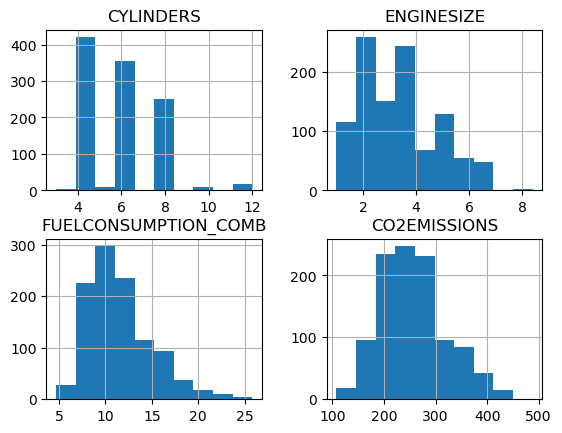

In [5]:
# x = # of cyl, size of eng, c02 emi, fuel consumptions
# y = count (vehicles)
cecf_df.hist()
plt.show()

### Now, let's plot cylinders, engine size, and combined fuel consumption againts Emmisions to see how linear their relationship is:
#### Illustrating relationship between <code>Fuel Consumption (COMB)</code> and <code>CO2 Emissions</code>

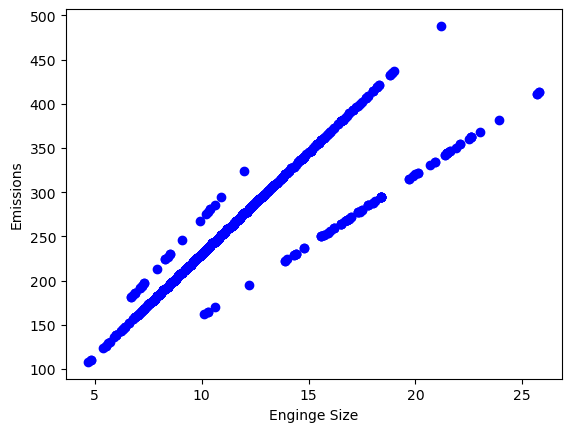

In [6]:
# FUELCONSUMPTION_COMB VS CO2 EMISSIONS
plt.scatter(cecf_df.FUELCONSUMPTION_COMB,
            cecf_df.CO2EMISSIONS,
            color='b')
plt.xlabel("Enginge Size")
plt.ylabel("Emissions")
plt.show()

#### Illustrating relationship between <code>Engine Size</code> and <code>CO2 Emissions</code>

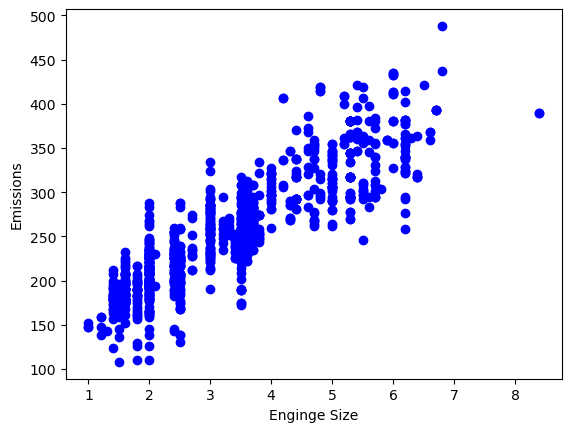

In [7]:
# ENGINESIZE_COMB VS CO2 EMISSIONS
plt.scatter(cecf_df.ENGINESIZE,
            cecf_df.CO2EMISSIONS,
            color='b')
plt.xlabel("Enginge Size")
plt.ylabel("Emissions")
plt.show()

#### Illustrating relationship between <code>Cylinders</code> and <code>CO2 Emissions</code>

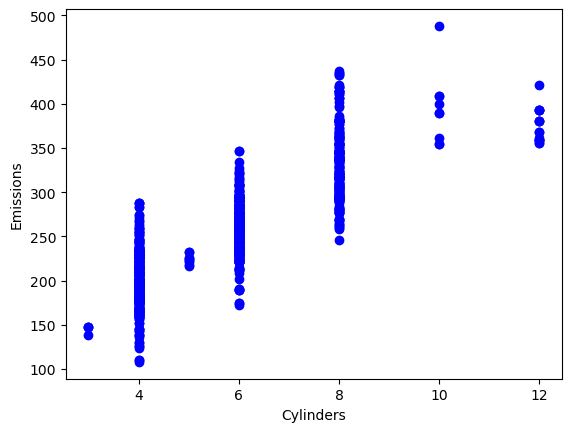

In [8]:
# CYLINDERS VS CO2 EMISSIONS
plt.scatter(cecf_df.CYLINDERS,
            cecf_df.CO2EMISSIONS,
            color='b')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

#### Inference:
From our scatter plots, we can safely assume that __all three__ of our features have a __positive linear__ relationship with CO2 emmisions.


## Let's build some models!
##### Creating our training and testing datasets
We will be using mutually exclusive sets, consisting of a 80% training set and a 20% testing set.

In [9]:
# creating array randmonly assigning T to 80% of the entries
# inverting to get the remaining 20% of the entries
msk = np.random.rand(len(df)) < 0.8
train_set = cecf_df[msk]
test_set = cecf_df[~msk]

### Training and Testing Data Distribution
We will first be building a model using <code>ENGINESIZE</code> as a predictor for <code>CO2EMISSIONS</code>

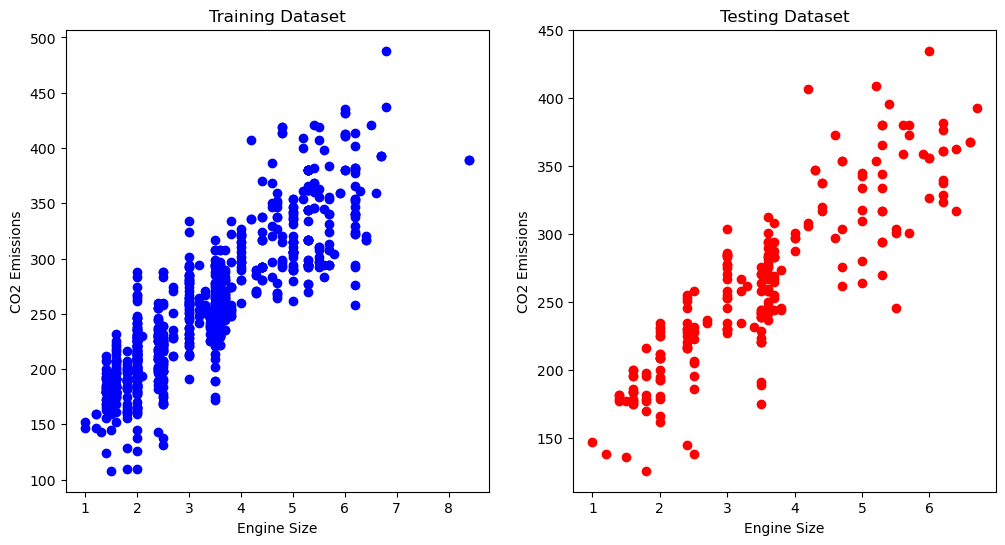

In [10]:
# defining figure
fig = plt.figure(figsize=(12,6))
# defining subplots
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
# training data distribution subplot
ax0.scatter(train_set.ENGINESIZE, train_set.CO2EMISSIONS, color='blue')
ax0.set_xlabel('Engine Size')
ax0.set_ylabel('CO2 Emissions')
ax0.set_title('Training Dataset')
# testing data distribution subplot
ax1.scatter(test_set.ENGINESIZE, test_set.CO2EMISSIONS, color='red')
ax1.set_xlabel('Engine Size')
ax1.set_ylabel('CO2 Emissions')
ax1.set_title('Testing Dataset')
plt.show()

## Modeling with sklearn
#### Model 1:

In [11]:
from sklearn import linear_model
rr = linear_model.LinearRegression()
# converting df to array
train_x = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])
# training model
rr.fit(train_x, train_y)
# coeffients: slope + intercept
print('Coefficients: ',rr.coef_)
print('Interceot: ',rr.intercept_)

Coefficients:  [[39.09488305]]
Interceot:  [125.43881062]


Plotting our fitted line

Text(0, 0.5, 'Emission')

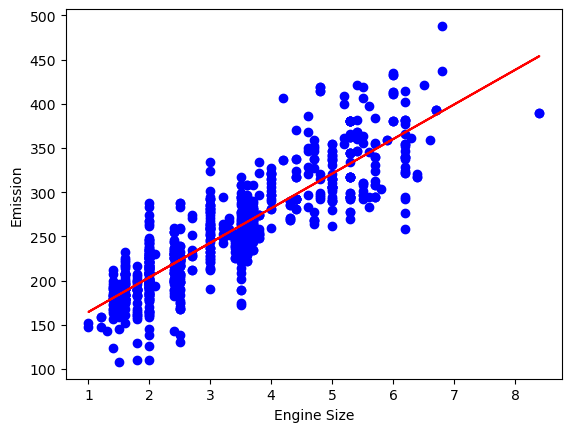

In [12]:
plt.scatter(train_set.ENGINESIZE, train_set.CO2EMISSIONS, color='blue')
plt.plot(train_x, rr.coef_[0][0]*train_x + rr.intercept_[0],'-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

#### Evaluations
Let's calculate the accuracy of our model using:
- Mean Absolute Error (MAE)
- Mean Squared Error/Residual Sum of Squares (MSE)
- R-Squared (R^2)

In [13]:
from sklearn.metrics import r2_score

# test predictors
test_x = np.asanyarray(test_set[['ENGINESIZE']])
# actual values
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])
# predicted values
yhat = rr.predict(test_x)

print("MAE: %.2f" % np.mean(np.absolute(yhat - test_y)))
print("MSE: %.2f" % np.mean((yhat - test_y) ** 2))
print("R^2: %.2f" % r2_score(test_y , yhat) )

MAE: 23.14
MSE: 923.62
R^2: 0.76


Now that we have evaluated how well our first model performs, let's build another.</br>
This time using <code>FUELCONSUMPTION_COMB</code> as the predictor for <code>CO2EMISSIONS</code>.</br>
#### Model 2:

In [14]:
train_x = np.asanyarray(train_set[['FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test_set[['FUELCONSUMPTION_COMB']])

In [15]:
rr = linear_model.LinearRegression()
rr.fit(train_x, train_y)
print ('Coefficients: ', rr.coef_)
print ('Intercept: ',rr.intercept_)

Coefficients:  [[15.79314642]]
Intercept:  [72.11643293]


In [16]:
yhat = rr.predict(test_x)

In [17]:
print("MAE: %.2f" % np.mean(np.absolute(yhat - test_y)))
print("MSE: %.2f" % np.mean((yhat - test_y) ** 2))
print("R^2: %.2f" % r2_score(test_y , yhat) )

MAE: 20.90
MSE: 779.27
R^2: 0.80


#### Inference:
On all three metrics, it seems that our second model performs much better.